# Plotting Individual Decision Trees from a trained XGBoost  model &#127795; &#127794;

Plotting individual decision trees can provide insight into the gradient boosting process for our [SUSY dataset](https://archive.ics.uci.edu/ml/datasets/SUSY#).

Useful tools for plotting trees are:
* XGBoost [**to_graphviz**](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.to_graphviz)

* graphviz [**render**](https://graphviz.readthedocs.io/en/stable/manual.html)

In [1]:
# Preparing the tools
import xgboost as xgb # conda install -c conda-forge xgboost 
import graphviz # conda install python-graphviz
import pickle
import os

Let's see how trees from `best_model` look. 

`best_model` is the trained XGBoost model with hyperparameters tuned with Bayesian optimization we saved to file in `SUSY.ipynb` using the standard `Python` `pickle` API.

In [2]:
# load model from file
loaded_best_model = pickle.load(open("best-model-18.pickle.dat", "rb"))

In [3]:
# Find number of trees of best_model
best_model_txt = open('best-model-18.raw.txt').read()
ntree = best_model_txt.count('booster')
ntree

736

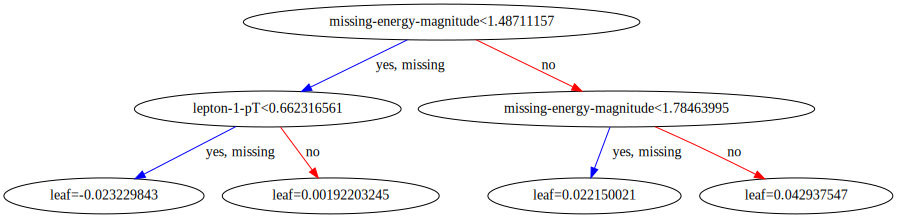

In [4]:
# Plotting the 33rd boosted tree
xgb.to_graphviz(loaded_best_model, num_trees=33, rankdir='UT')

In [5]:
# Plot all the individual decision trees from our trained XGBoost model and store them into 'trees' folder

estimators = range(0, ntree)
for n in estimators:
    xgb.to_graphviz(loaded_best_model, num_trees=n, rankdir='UT').render('trees/tree_%i.gv'%n, view=False) 
    os.remove('trees/tree_%i.gv'%n)